/home/nikhil/anaconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100/600, loss 0.4752
epoch 1 / 2, step 200/600, loss 0.3106
epoch 1 / 2, step 300/600, loss 0.2767
epoch 1 / 2, step 400/600, loss 0.2298
epoch 1 / 2, step 500/600, loss 0.2041
epoch 1 / 2, step 600/600, loss 0.2352
epoch 2 / 2, step 100/600, loss 0.2155
epoch 2 / 2, step 200/600, loss 0.2130
epoch 2 / 2, step 300/600, loss 0.2188
epoch 2 / 2, step 400/600, loss 0.0747
epoch 2 / 2, step 500/600, loss 0.2852
epoch 2 / 2, step 600/600, loss 0.2409
accuracy 95.37


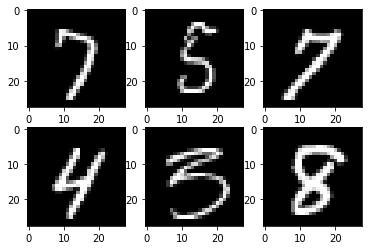

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameter
input_size = 784 # 28*28
hidden_size = 100
num_clsses = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
training_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                   transform=transforms.ToTensor(), download=True)

testing_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=testing_dataset,batch_size=batch_size,shuffle=False)

examaple = iter(train_loader)
samples, labels = next(examaple)
print(samples.shape, labels.shape)    #print shape here

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
#plt.show()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_clsses)
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size,num_clsses)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loops
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #100, 1, 28, 28
        #100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')
            
# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value , index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy {acc}')
        
        
    
    